# Classification of time-series using `tslearn`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time_series_generators import *

from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.neural_network import TimeSeriesMLPClassifier

## A test helper function

In [16]:
def random_test(clf):
    idx = np.random.randint(0,n_series)
    plt.figure(figsize=(12,4))
    plt.plot(dataX[idx])
    plt.show()
    x_test = TimeSeriesScalerMinMax().fit_transform(to_time_series_dataset(dataX[idx]))
    pred = int(clf.predict(x_test))
    print("Prediction: This belongs to class", pred)
    print("-"*50)
    print("Ground truth: This belongs to class:", dataY[idx])
    print("\n\n")

## An example time-series generation (with low fraction of anomalies)

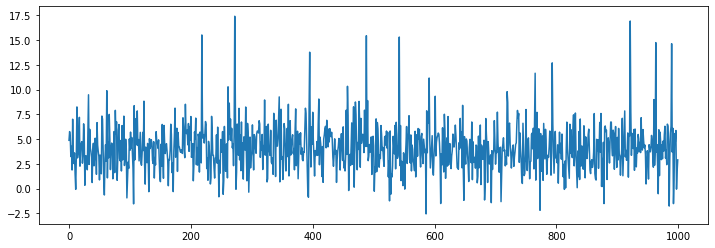

In [17]:
a = gen_series_anomaly(size=1000,anomaly_frac=0.03,anomaly_scale=0.25,
                    loc=4,scale=2,)
plt.figure(figsize=(12,4))
plt.plot(np.arange(len(a)),a)
plt.show()

## An example time-series generation (with high fraction of anomalies)

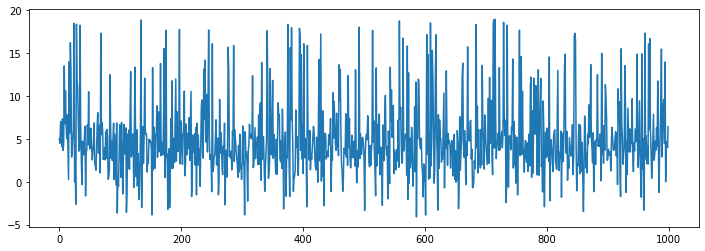

In [18]:
a = gen_series_anomaly(size=1000,anomaly_frac=0.3,anomaly_scale=0.25,
                    loc=4,scale=2,)
plt.figure(figsize=(12,4))
plt.plot(np.arange(len(a)),a)
plt.show()

## Generating dataframe of time-series

- 1,000 time-series (each of length 100 points)
- 75% of the time-series are _normal_
- 25% of the time-series contain anomalies

In [19]:
n_series = 1000
df = gen_ts_dataframe(n_series,prob_anomolous=0.25,size=100)

## Data preparation for `tslearn`

In [20]:
dataX = list(df['ts'])
dataY = list(df['anomolous'])
X = to_time_series_dataset(dataX)
y = dataY
X_scaled = TimeSeriesScalerMinMax().fit_transform(X)

## kNN fitting

In [21]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=10)
knn.fit(X_scaled, y)

KNeighborsTimeSeriesClassifier(n_neighbors=10)

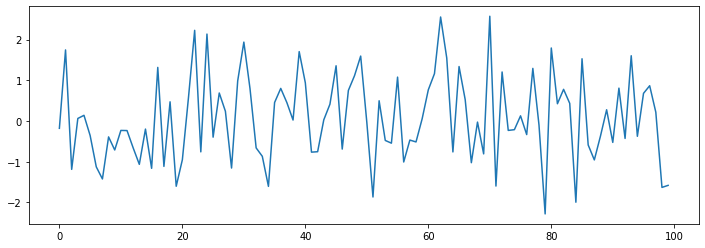

Prediction: This belongs to class 0
--------------------------------------------------
Ground truth: This belongs to class: 0





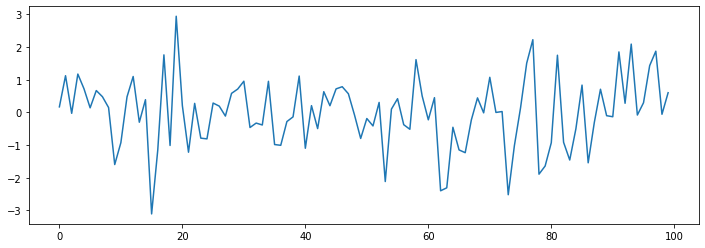

Prediction: This belongs to class 0
--------------------------------------------------
Ground truth: This belongs to class: 0





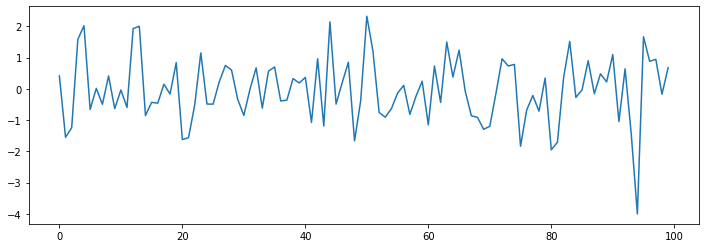

Prediction: This belongs to class 1
--------------------------------------------------
Ground truth: This belongs to class: 0





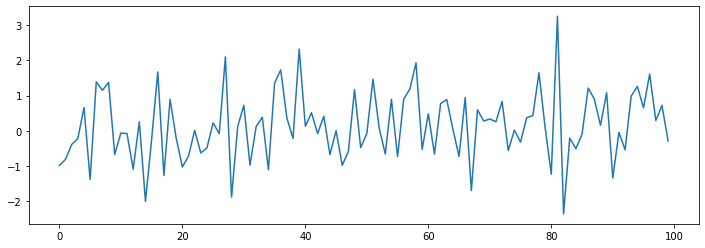

Prediction: This belongs to class 0
--------------------------------------------------
Ground truth: This belongs to class: 0





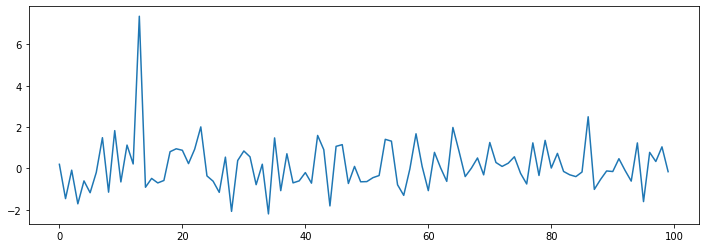

Prediction: This belongs to class 1
--------------------------------------------------
Ground truth: This belongs to class: 1





In [22]:
for _ in range(5):
    random_test(knn)

## Neural network fitting

In [23]:
mlp = TimeSeriesMLPClassifier(hidden_layer_sizes=(64, 64),random_state=0,learning_rate_init=0.01,verbose=True)
mlp.fit(X_scaled,y)

Iteration 1, loss = 0.62965842
Iteration 2, loss = 0.58047918
Iteration 3, loss = 0.57882985
Iteration 4, loss = 0.57384639
Iteration 5, loss = 0.57743798
Iteration 6, loss = 0.56688634
Iteration 7, loss = 0.56117301
Iteration 8, loss = 0.55538077
Iteration 9, loss = 0.55425173
Iteration 10, loss = 0.53888809
Iteration 11, loss = 0.52811796
Iteration 12, loss = 0.51881563
Iteration 13, loss = 0.49930865
Iteration 14, loss = 0.48317425
Iteration 15, loss = 0.46553549
Iteration 16, loss = 0.43432432
Iteration 17, loss = 0.40748624
Iteration 18, loss = 0.38821810
Iteration 19, loss = 0.39165140
Iteration 20, loss = 0.39743397
Iteration 21, loss = 0.37005463
Iteration 22, loss = 0.33699451
Iteration 23, loss = 0.30322405
Iteration 24, loss = 0.28730279
Iteration 25, loss = 0.26840086
Iteration 26, loss = 0.25580684
Iteration 27, loss = 0.24982796
Iteration 28, loss = 0.26013302
Iteration 29, loss = 0.27614638
Iteration 30, loss = 0.27673476
Iteration 31, loss = 0.29020205
Iteration 32, los

TimeSeriesMLPClassifier(hidden_layer_sizes=(64, 64), learning_rate_init=0.01,
                        random_state=0, verbose=True)

In [24]:
mlp.score(X_scaled,y)

0.981

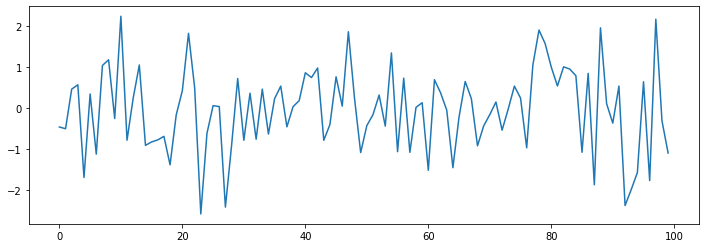

Prediction: This belongs to class 0
--------------------------------------------------
Ground truth: This belongs to class: 0





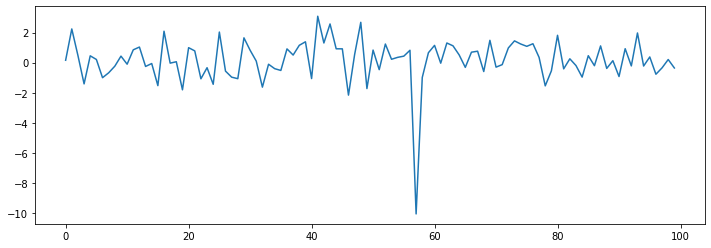

Prediction: This belongs to class 1
--------------------------------------------------
Ground truth: This belongs to class: 1





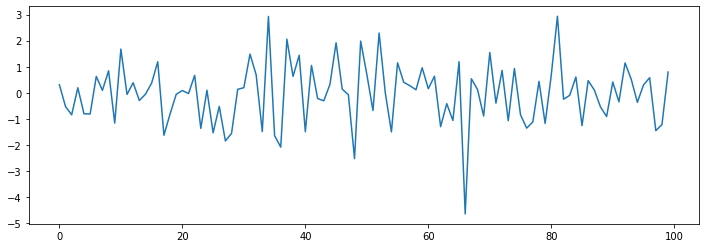

Prediction: This belongs to class 1
--------------------------------------------------
Ground truth: This belongs to class: 1





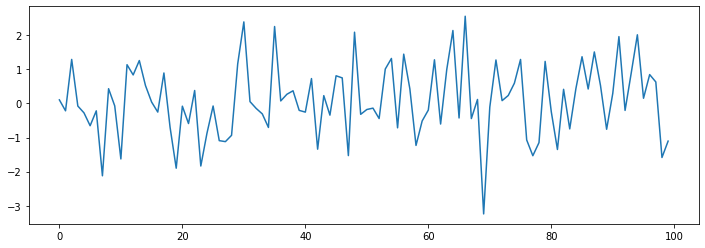

Prediction: This belongs to class 0
--------------------------------------------------
Ground truth: This belongs to class: 0





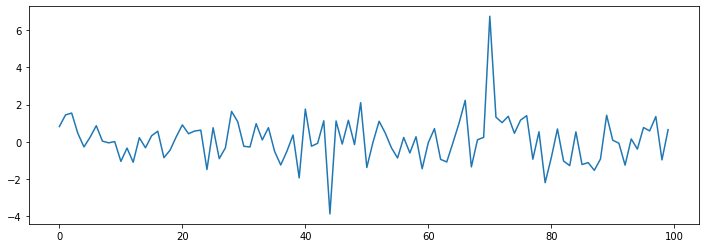

Prediction: This belongs to class 1
--------------------------------------------------
Ground truth: This belongs to class: 1





In [25]:
for _ in range(5):
    random_test(mlp)